# Numerical Simulation Laboratory
## Exercise sheet 02

### Exercise 02.1.1
We use Monte Carlo quadrature to evaluate
$$I = \int_0^1 \dfrac{\pi}{2}\cos(\pi \dfrac{x}{2}) dx = 1$$

Number of blocks: N = 10000
Number of throws in each block: L = 10000


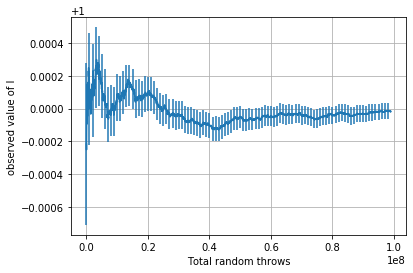

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
with open('1.1/results.out') as resultsfile: 
    N = int(resultsfile.readline().split()[0])
    throws = int(resultsfile.readline().split()[0])
    print("Number of blocks: N =", N)
    print("Number of throws in each block: L =", throws)
    resultsfile.readline() #kill the line with the comments
    resultsfile.readline() #kill the first line, where the mean stdev can't be computed
    extra_killed_lines = 100
    realN = N-2-extra_killed_lines
    for i in range(0,extra_killed_lines):
        resultsfile.readline()
    numbers = np.zeros(realN)
    means_v = np.zeros(realN)
    errors_v = np.zeros(realN)
    for i in range(0,realN):
        temp = resultsfile.readline().split()
        numbers[i] = i
        means_v[i] = temp[0]
        errors_v[i] = temp[1]

    plt.errorbar(numbers*throws, means_v, yerr=errors_v, errorevery=100)
    plt.xlabel('Total random throws')
    plt.ylabel('observed value of I')
    plt.grid(True)
    plt.show()

### Exercise 02.1.2
We try to apply the method of importance sampling to improve the accuracy of our Monte Carlo quadrature.
At first, we tried to use a second-order Taylor expansion of the integrand $f(x) = \frac{\pi}{2}\cos(\pi x/2)$ for the probability distribution:

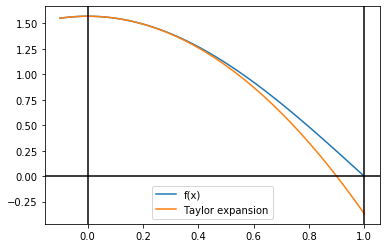

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
x = np.linspace(-0.1,1.001,100)

plt.plot(x, 0.5*math.pi*np.cos(0.5*math.pi*x))
plt.plot(x,  0.5*math.pi - (1./16.)*(math.pi**3)*(x**2) )
plt.axvline(x=0., color = 'black')
plt.axvline(x=1., color = 'black')
plt.axhline(y=0., color = 'black')
plt.legend(['f(x)', 'Taylor expansion'])
plt.show()

We found that this method doesn't work particularly well, possibly because of the change in sign of the Taylor expansion, which forces us to take the absolute value to construct the probability density distribution. Moreover, we had to use the rejection method to generate numbers according to the distribution, which decreases the effective speed of the calculation.

We then took a different approach and used a Gaussian distribution which loosely resembles the shape of $f(x)$: 

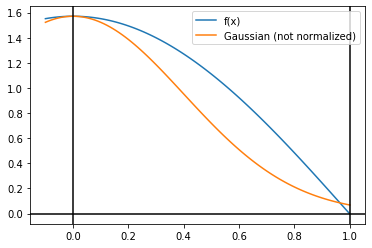

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
x = np.linspace(-0.1,1.001,100)

plt.plot(x, 0.5*math.pi*np.cos(0.5*math.pi*x))
plt.plot(x,   0.5*math.pi *np.exp( -0.5*pow((x/0.4) ,2)) )
plt.axvline(x=0., color = 'black')
plt.axvline(x=1., color = 'black')
plt.axhline(y=0., color = 'black')
plt.legend(['f(x)', 'Gaussian (not normalized)'])
plt.show()

Number of blocks: N = 10000
Number of throws in each block: L = 10000


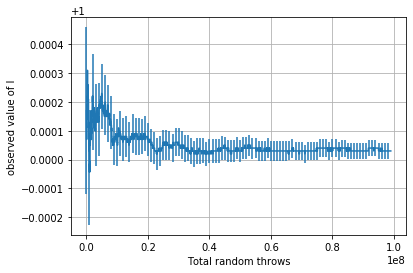

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
with open('1.2.alt/results.out') as resultsfile: 
    N = int(resultsfile.readline().split()[0])
    throws = int(resultsfile.readline().split()[0])
    print("Number of blocks: N =", N)
    print("Number of throws in each block: L =", throws)
    resultsfile.readline() #kill the line with the comments
    resultsfile.readline() #kill the first line, where the mean stdev can't be computed
    extra_killed_lines = 100
    realN = N-2-extra_killed_lines
    for i in range(0,extra_killed_lines):
        resultsfile.readline()
    numbers = np.zeros(realN)
    means_v = np.zeros(realN)
    errors_v = np.zeros(realN)
    for i in range(0,realN):
        temp = resultsfile.readline().split()
        numbers[i] = i
        means_v[i] = temp[0]
        errors_v[i] = temp[1]

    plt.errorbar(numbers*throws, means_v, yerr=errors_v, errorevery=100)
    plt.xlabel('Total random throws')
    plt.ylabel('observed value of I')
    plt.grid(True)
    
    plt.show()

With this approach the variance reduction is probably not too high, but since Gaussian random numbers are easily calculated, the method is efficient.

However, in this particular case, the accuracy improvement over the uniform distribution method doesn't seem to be decisive. The variation in convergence speed between the two methods seems to be on the same order on the variation due to chance when using different random seeds. 

### Exercise 02.2.1

We plot the value of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, the standard deviation from the mean value zero, for a random walk on a 3D cubic lattice. As usual, we use data blocking to calculate the statistical uncertainty. The resulting curve is fitted with a function $f(N)=k\sqrt{N}$.

k = 0.9250419101092757


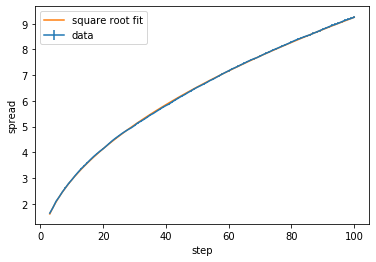

In [7]:
from scipy import optimize
datx, daty, err = np.loadtxt("2.1/results.out", skiprows=5, unpack=True)
plt.errorbar(datx, daty, yerr=err, label='data')

def fit(x, k):
    return k * np.sqrt(x)
params, params_covariance = optimize.curve_fit(fit, datx, daty)
print("k =",params[0])
plt.plot(datx, fit(datx, params[0]), label='square root fit')
plt.xlabel('step')
plt.ylabel('spread')
plt.legend()
plt.show()

As we can see, the square root fit is perfect. With our parameters, the diffusive approximation is very good.

### Exercise 02.2.2

We repeat the analysis of the previous exercise for a "spherical" random walk, in which the walker takes a step of constant length in a direction chosen sampling uniformly the whole solid angle.

k = 1.186061379763648


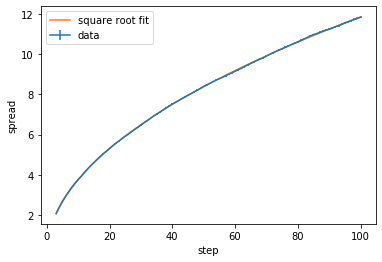

In [8]:
from scipy import optimize
datx, daty, err = np.loadtxt("2.2/results.out", skiprows=5, unpack=True)
plt.errorbar(datx, daty, yerr=err, label='data')

def fit(x, k):
    return k * np.sqrt(x)
params, params_covariance = optimize.curve_fit(fit, datx, daty)
print("k =",params[0])
plt.plot(datx, fit(datx, params[0]), label='square root fit')
plt.xlabel('step')
plt.ylabel('spread')
plt.legend()
plt.show()

The fit is still very good.